In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special
from scipy.signal import argrelextrema

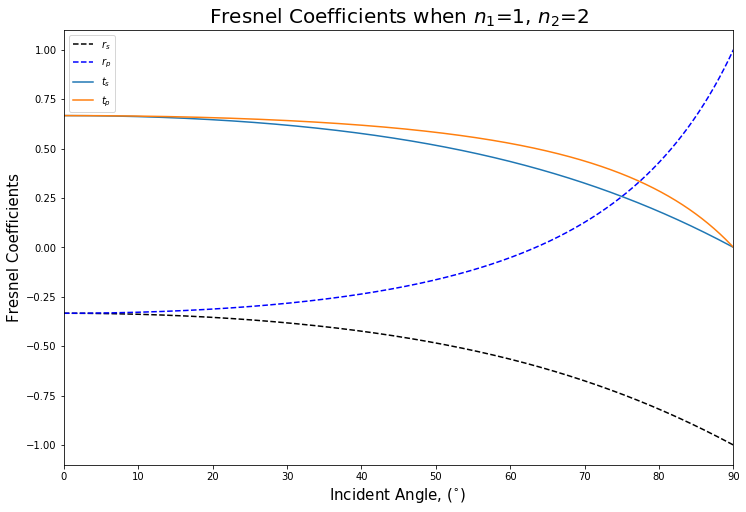

In [2]:
n = 2

iangles = np.linspace(0,np.pi/2,1000)
tangles1 = np.arcsin((1/n)*np.sin(iangles))

rs1 = (np.cos(iangles) - n*np.cos(tangles1))/(np.cos(iangles) + n*np.cos(tangles1))
rp1 = (np.cos(tangles1) - n*np.cos(iangles))/(np.cos(tangles1) + n*np.cos(iangles))
ts1 = (2*np.cos(iangles))/((np.cos(iangles) + n*np.cos(tangles1)))
tp1 = (2*np.cos(iangles))/((np.cos(tangles1) + n*np.cos(iangles)))

plt.figure(figsize=(12,8))
plt.plot(iangles*(180/np.pi), rs1, '--k',label='$r_s$')
plt.plot(iangles*(180/np.pi), rp1, '--b',label='$r_p$')
plt.plot(iangles*(180/np.pi), ts1, label='$t_s$')
plt.plot(iangles*(180/np.pi), tp1, label='$t_p$')
plt.xlim(0,90)
plt.xlabel('Incident Angle, ($^{\circ})$ ',fontsize=15)
plt.ylabel('Fresnel Coefficients',fontsize=15)
plt.title('Fresnel Coefficients when $n_1$=1, $n_2$=2',fontsize=20)
plt.legend()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arcsin
  """Entry point for launching an IPython kernel.


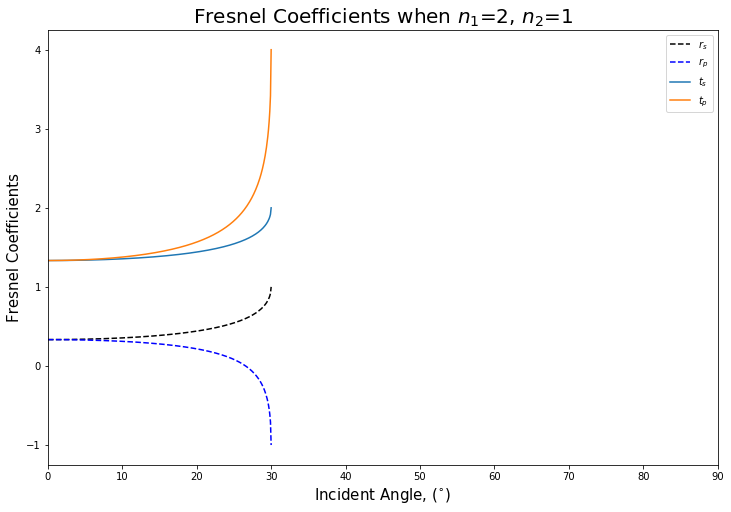

In [3]:
tangles2 = np.arcsin((n)*np.sin(iangles))

rs2 = (n*np.cos(iangles) - np.cos(tangles2))/(n*np.cos(iangles) + np.cos(tangles2))
rp2 = (n*np.cos(tangles2) - np.cos(iangles))/(n*np.cos(tangles2) + np.cos(iangles))
ts2 = (2*n*np.cos(iangles))/((n*np.cos(iangles) + np.cos(tangles2)))
tp2 = (2*n*np.cos(iangles))/((n*np.cos(tangles2) + np.cos(iangles)))

plt.figure(figsize=(12,8))
plt.plot(iangles*(180/np.pi), rs2, '--k',label='$r_s$')
plt.plot(iangles*(180/np.pi), rp2, '--b',label='$r_p$')
plt.plot(iangles*(180/np.pi), ts2, label='$t_s$')
plt.plot(iangles*(180/np.pi), tp2, label='$t_p$')
plt.xlim(0,90)
plt.xlabel('Incident Angle, ($^{\circ})$ ',fontsize=15)
plt.ylabel('Fresnel Coefficients',fontsize=15)
plt.title('Fresnel Coefficients when $n_1$=2, $n_2$=1',fontsize=20)
plt.legend()

Brewster's Angle occurs at r_p = 0 (zero crossings), as seen in the plots above. 

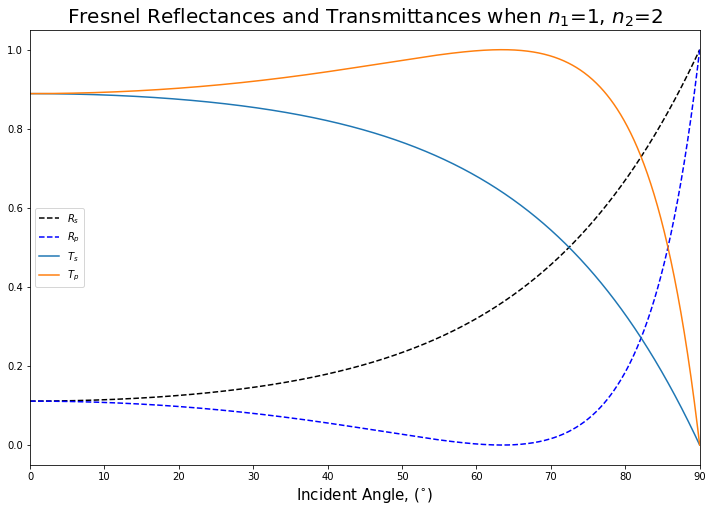

In [4]:
#Reflectances

plt.figure(figsize=(12,8))
plt.plot(iangles*(180/np.pi), rs1**2, '--k',label='$R_s$')
plt.plot(iangles*(180/np.pi), rp1**2, '--b',label='$R_p$')
plt.plot(iangles*(180/np.pi), 1-rs1**2, label='$T_s$')
plt.plot(iangles*(180/np.pi), 1-rp1**2, label='$T_p$')
plt.xlim(0,90)
plt.xlabel('Incident Angle, ($^{\circ})$ ',fontsize=15)
plt.title('Fresnel Reflectances and Transmittances when $n_1$=1, $n_2$=2',fontsize=20)
plt.legend()

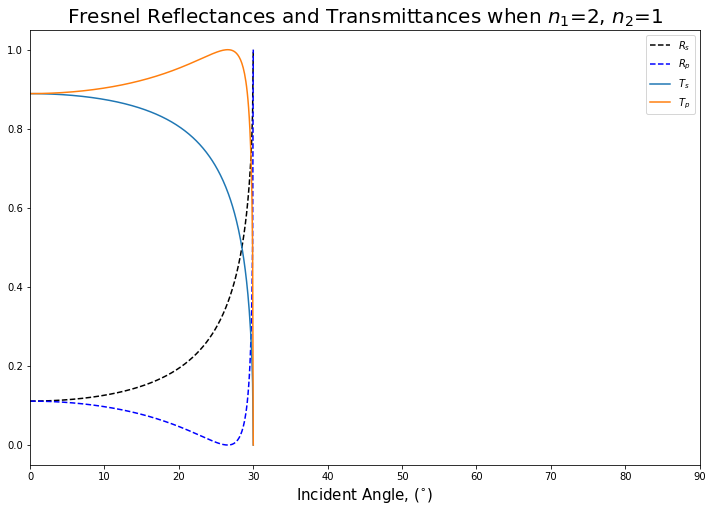

In [5]:
plt.figure(figsize=(12,8))
plt.plot(iangles*(180/np.pi), rs2**2, '--k',label='$R_s$')
plt.plot(iangles*(180/np.pi), rp2**2, '--b',label='$R_p$')
plt.plot(iangles*(180/np.pi), 1-rs2**2, label='$T_s$')
plt.plot(iangles*(180/np.pi), 1-rp2**2, label='$T_p$')
plt.xlim(0,90)
plt.xlabel('Incident Angle, ($^{\circ})$ ',fontsize=15)
plt.title('Fresnel Reflectances and Transmittances when $n_1$=2, $n_2$=1',fontsize=20)
plt.legend()

r_p is 0 at brewster's angle, which corresponds to the zero crossing. At brewster's angle, the refracted and reflected ray have an angle of 90 degrees between them. The coefficient signs depend on the original field directions/angle and the medium we are entering/exiting. For example, from air to glass at normal incident, we have r_s=r_p. Furthermore, the signs also depend on the phase of the incoming waves. When out of phase, theta_t-theta_i = pi and when in phase, its just 0. This can lead to them having the same or opposite signs.  

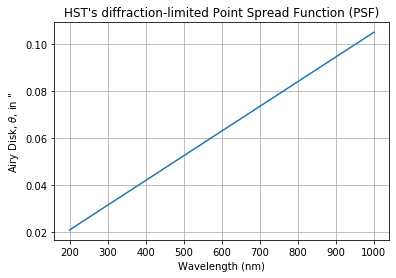

In [6]:
# 3c)
diam = 2.4
wave = np.linspace(200E-9,1000E-9,800)   
theta = 1.22*206265*wave/diam
plt.plot(wave*1E9, theta) 
plt.xlabel('Wavelength (nm)')
plt.ylabel(r'Airy Disk, $\theta$, in "')
plt.title("HST's diffraction-limited Point Spread Function (PSF)")
plt.grid()
plt.show()

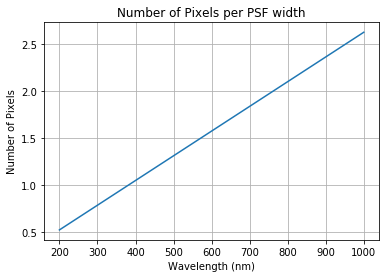

In [7]:
# 3d)
platescale = 0.04  #arcsec/pixel
numPix = theta/platescale
plt.plot(wave*1E9,numPix)
plt.title('Number of Pixels per PSF width')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Number of Pixels')
plt.grid()
plt.show()

At lower wavelengths (higher frequencies), there is undersampling because there's fewer pixels that can properly sample high energy radiation. They are not sensitive enough at these high frequencies (low wavelengths) so we expect a small number of pixels, which we can indeed see. The PSF center could fall anywhere on a pixel, which is why it is very sensitive. We know from the Airy Disk that for small wavelengths, the first zero or width of PSF will also be small (linearly dependent on wavelength).  We also know that due to undersampling, there could be aliasing of fourier modes. See  the aliasing plot we discussed during lecture.
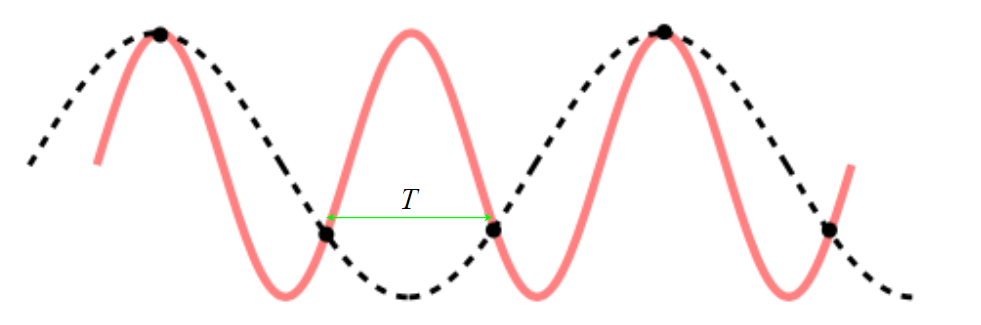

In [21]:
# #4a)

# x = np.linspace(-20,20,1000)
# b = 2.3*special.jv(1,2.3*x)
# a = special.jv(1,x)

# plt.figure(figsize=(12,8))
# plt.subplot(111)
# plt.plot(x,2*a/x, label="Cassegrain")
# plt.xlabel("x",fontsize=15)
# plt.ylabel(r"$\psi_a$",fontsize=20)
# plt.title(r"Far-Field Distribution, $\psi(\rho,z)$",fontsize=20)
# plt.legend()

# plt.figure(figsize=(12,8))
# plt.subplot(111)
# plt.plot(x,2*b/x, label="Mayall")
# plt.xlabel("x",fontsize=15)
# plt.ylabel(r"$\psi_b$",fontsize=20)
# plt.title(r"Far-Field Distribution, $\psi(\rho,z)$",fontsize=20)
# plt.legend()

In [22]:
# plt.figure(figsize=(12,8))
# psi = ((b-a)/x)/2.145
# plt.plot(x,psi,label="annular")
# #plt.plot(x,2*b/x,label="Mayall")
# plt.xlabel("x",fontsize=15)
# plt.ylabel(r"$\psi$",fontsize=20)
# plt.title(r"Far-Field Distribution, $\psi(\rho,z)$, of annular aperture",fontsize=20)
# plt.legend()

In [23]:
# #4b)
# plt.figure(figsize=(12,8))
# I = (np.abs(psi))**2
# plt.xlabel("x",fontsize=15)
# plt.ylabel("Intensity, I",fontsize=15)
# plt.title("Intensity Distribution",fontsize=20)
# plt.plot(x,I)

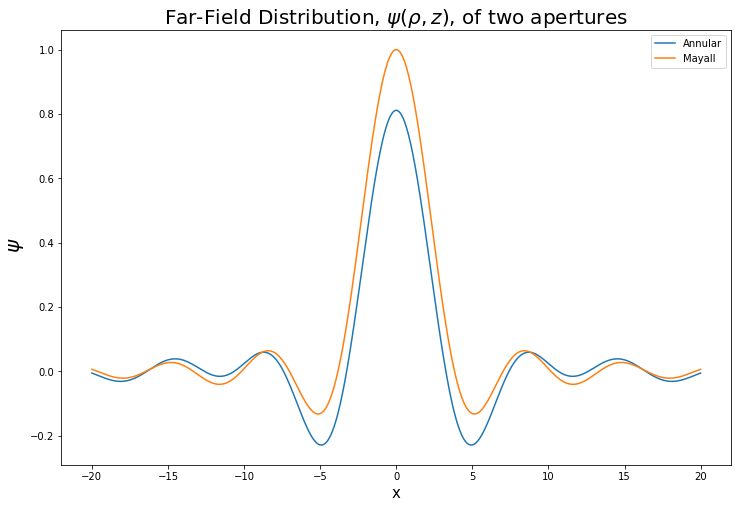

In [43]:
#4a) I will plot two plots, one in which the annular is not normalized and one in which it is. Just to see trend. 
a,b = 3.8,1.65
C = b/a

x = np.linspace(-20,20,1000)
b = C*special.jv(1,C*x)
a = special.jv(1,x)

mayall = 2*a/x
psi = 2*((a-b)/x)

plt.figure(figsize=(12,8))
plt.plot(x,psi,label="Annular")
plt.plot(x,mayall,label="Mayall")
plt.xlabel("x",fontsize=15)
plt.ylabel(r" $\psi$",fontsize=20)
plt.title(r"Far-Field Distribution, $\psi(\rho,z)$, of two apertures",fontsize=20)
plt.legend()

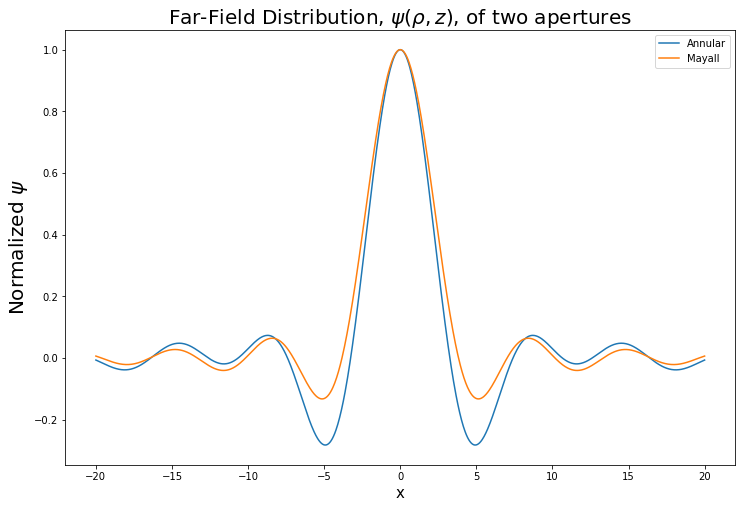

In [44]:
plt.figure(figsize=(12,8))
plt.plot(x,psi/np.max(psi),label="Annular")
plt.plot(x,mayall,label="Mayall")
plt.xlabel("x",fontsize=15)
plt.ylabel(r"Normalized $\psi$",fontsize=20)
plt.title(r"Far-Field Distribution, $\psi(\rho,z)$, of two apertures",fontsize=20)
plt.legend()

Text(0.5, 1.0, 'Intensity Distribution of annular aperture')

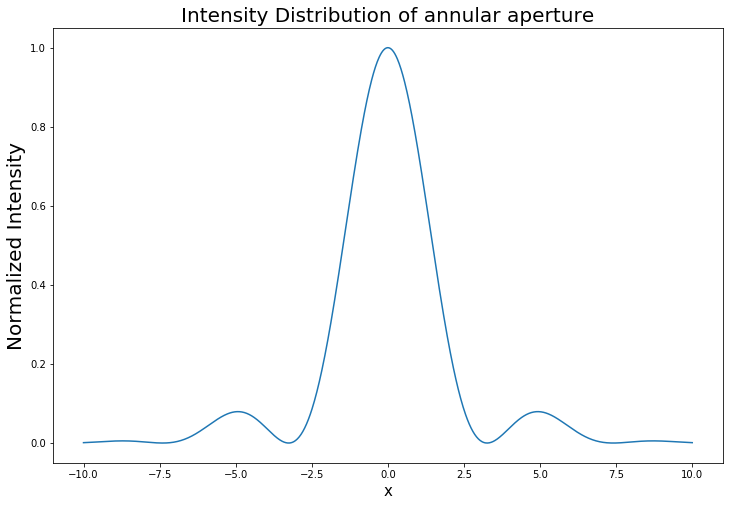

In [17]:
#4b)
r_a,r_b = 3.8,1.65
C = r_b/r_a
x = np.linspace(-10,10,1000)
const = 4/((1-C**2)**2)
b = C*special.jv(1,C*x)
a = special.jv(1,x)
#Int_ann = const*((special.jv(1,x)/x - C*special.jv(1,C*x)/x)**2)
Int_ann = const*(((a-b)/x)**2)

plt.figure(figsize=(12,8))
plt.plot(x,Int_ann)
plt.xlabel("x",fontsize=15)
plt.ylabel(r"Normalized Intensity",fontsize=20)
plt.title(r"Intensity Distribution of annular aperture",fontsize=20)

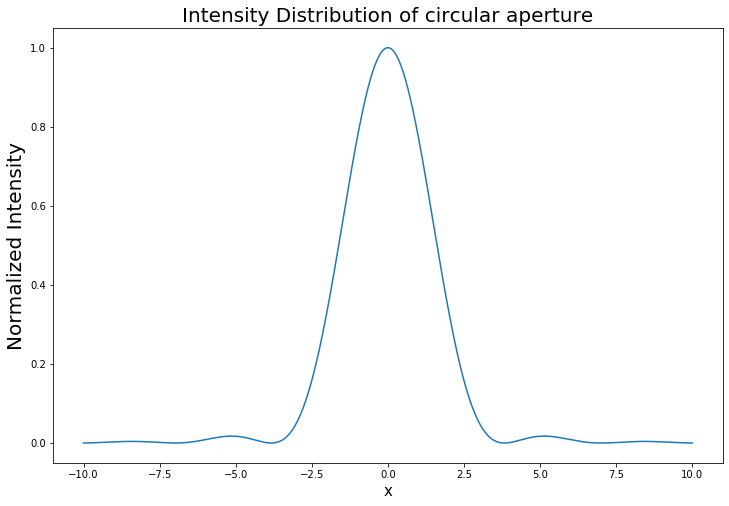

In [18]:
Int_circ = (2*a/x)**2
plt.figure(figsize=(12,8))
plt.plot(x,Int_circ)
plt.xlabel("x",fontsize=15)
plt.ylabel(r"Normalized Intensity",fontsize=20)
plt.title(r"Intensity Distribution of circular aperture",fontsize=20)

4c) As can be seen in plot 4a, the width of the central max of the annular aperture is narrower. This means that the annular aperture has a higher spatial resolution. This is further shown in the handwritten part of 4c. 

In [21]:
#4d)
cont_a = Int_ann[argrelextrema(Int_ann,np.greater)]
ratio = np.max(Int_ann)/cont_a[1]

cont_c = Int_circ[argrelextrema(Int_circ,np.greater)]
ratio2 = np.max(Int_circ)/cont_c[1]

print("Ratio of principal and secondary maxima of annular aperture: ", ratio)
print("Ratio of principal and secondary maxima of circular aperture: ", ratio2)
print("\nThis shows that even though the annular aperture has a higher spatial resolution, there's a tradeoff in the contrast.")
print("Although we get a higher spatial resolution, this leads to a lower contrast since ratio of the annular is less than the ratio of the circular.")

Ratio of principal and secondary maxima of annular aperture:  12.591788875554691
Ratio of principal and secondary maxima of circular aperture:  57.14841862557657

This shows that even though the annular aperture has a higher spatial resolution, there's a tradeoff in the contrast.
Although we get a higher spatial resolution, this leads to a lower contrast since ratio of the annular is less than the ratio of the circular.


Text(0.5, 1.0, 'Intensity pattern of linear array of alternating by $\\pi$ dipoles')

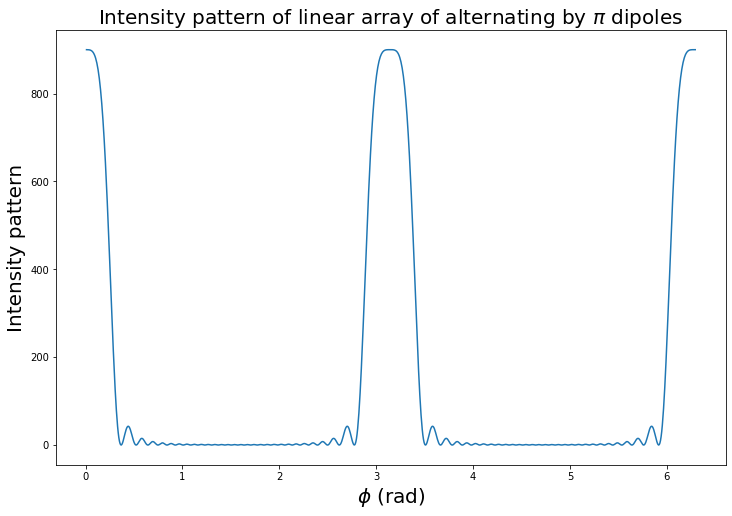

In [24]:
#5
phi = np.linspace(0.01,2*np.pi+0.01,1000)
num = np.sin(15*np.pi*(1+np.cos(phi)))
den = np.sin(np.pi*(1+np.cos(phi))/2)
I = (num/den)**2

plt.figure(figsize=(12,8))
plt.plot(phi,I)
plt.xlabel(r"$\phi$ (rad)",fontsize=20)
plt.ylabel("Intensity pattern",fontsize=20)
plt.title("Intensity pattern of linear array of alternating by $\pi$ dipoles",fontsize=20)